### An example showing the plot_roc_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `roc_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_roc_curve` method.

In [1]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp
sp.__version__

'0.3.9rc4'

In [2]:
# Load the data
X, y = data_3_classes(return_X_y=True, as_frame=False)

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=0
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((75, 804), (75, 804), (75,), (75,))

In [3]:
# Create an instance of the LogisticRegression
model = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train)

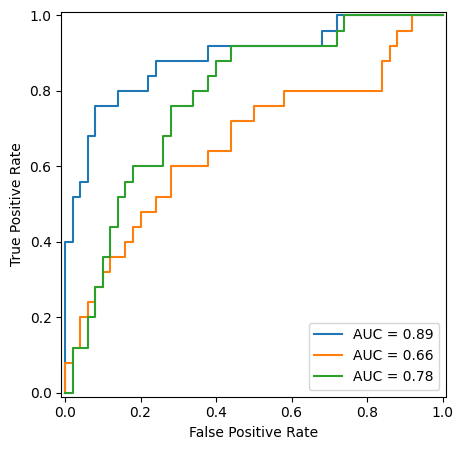

In [4]:
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn import metrics

y_val_prob = model.predict_proba(X_val)

fpr, tpr, _ = roc_curve(
    y_val==0, y_val_prob[:, 0],
    # pos_label=model.classes_[1]
)
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()


ax = plt.gca()
fpr, tpr, _ = roc_curve(
    y_val==1, y_val_prob[:, 1],
    # pos_label=model.classes_[1]
)
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax = ax)


ax = plt.gca()
fpr, tpr, _ = roc_curve(
    y_val==2, y_val_prob[:, 2],
    # pos_label=model.classes_[1]
)
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax = ax)

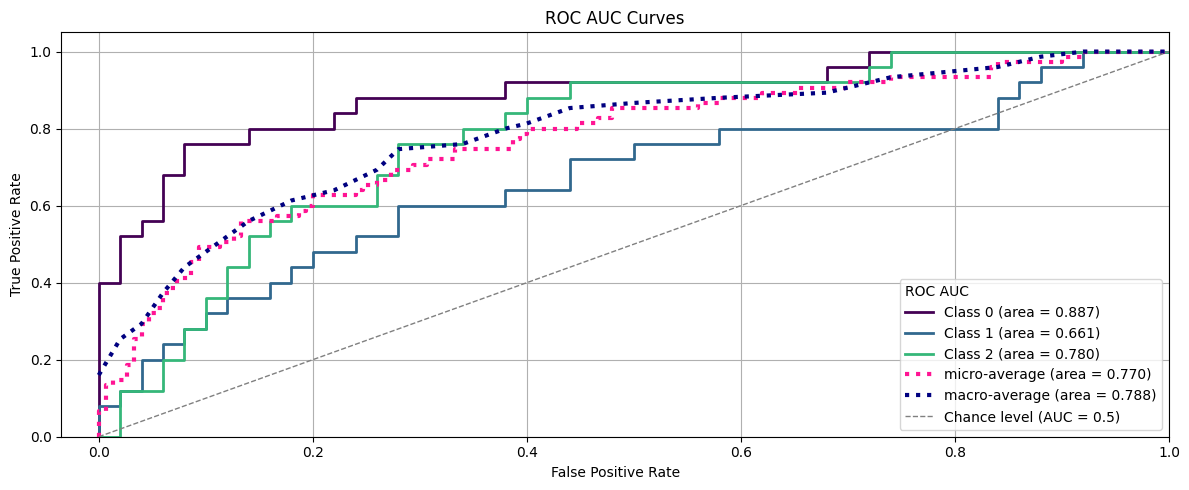

In [5]:
# Perform predictions
y_val_prob = model.predict_proba(X_val)

# Plot!
ax = sp.metrics.plot_roc(
    y_val, y_val_prob
);

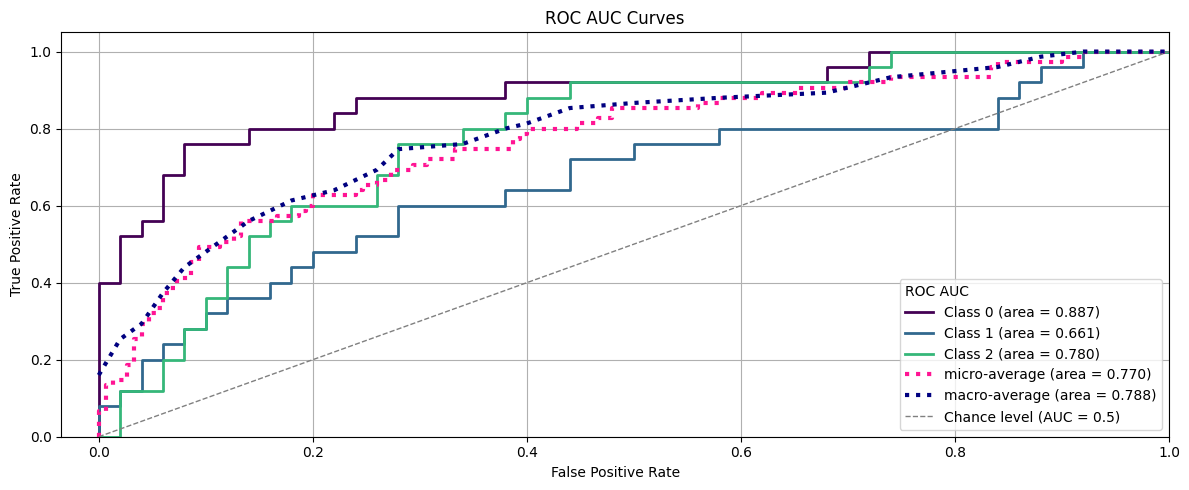

In [6]:
# Perform predictions
y_val_prob = model.predict_proba(X_val)

# Plot!
ax = sp.metrics.plot_roc(
    y_val, y_val_prob
);

In [7]:
# Load the data
X, y = data_10_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

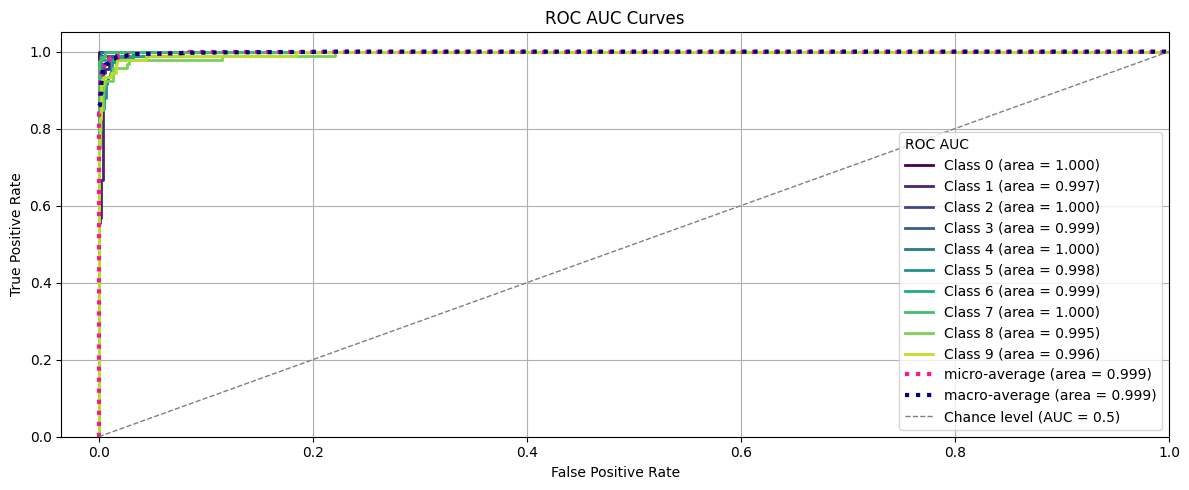

In [8]:
# Create an instance of the LogisticRegression
model = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train)

# Perform predictions
y_val_prob = model.predict_proba(X_val)

# Plot!
ax = sp.metrics.plot_roc(
    y_val, y_val_prob
);